# Capítulo 14

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

## Fórmulas

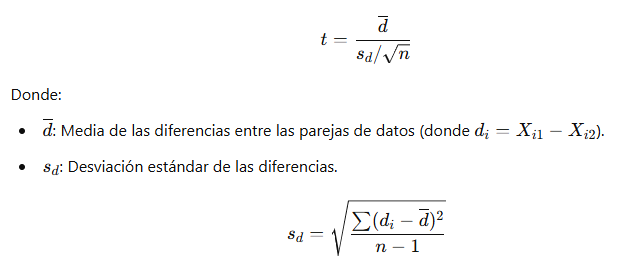

### Otra forma de calcular el error estándar de la diferencia de medias

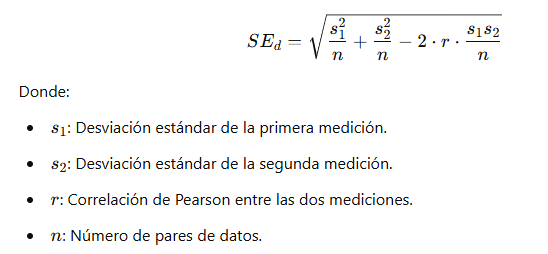

## Ejercicio 1

In [63]:
media1 = 14.2
desvio1 = 2
n = 17
desvio1_cuadrado = desvio1 **2/n

media2 = 12.9
desvio2 = 1.5
desvio2_cuadrado = desvio2 **2/n

r = 0.55

termino_correlacion = 2 * r * ((desvio1 * desvio2)/n)

dif_medias = media1 - media2

error_estandar = np.sqrt(desvio1_cuadrado + desvio2_cuadrado - termino_correlacion)

t_obtenido = dif_medias / error_estandar
p_valor = 2 * (1- t.cdf(abs(t_obtenido), df = 16))

print('t obtnenido:', round(t_obtenido, 2))
print('p-valor:', round(p_valor, 4))

t obtnenido: 3.12
p-valor: 0.0066


Se rechaza H0

## Ejercicio 2

In [64]:
n = 17
error_estandar = np.sqrt((desvio1**2)/(n-1) + (desvio2**2)/(n-1))

t_obtenido = dif_medias / error_estandar
p_valor = 2 * (1- t.cdf(t_obtenido, df = 32))

print('t obtnenido:', round(t_obtenido, 2))
print('p-valor:', round(p_valor, 4))

t obtnenido: 2.08
p-valor: 0.0456


Se acepta H0

## Ejercicio 3

In [65]:
liga_americana = [16,17,15,12,11,9,13,16,18,14]
liga_nacional = [18,11,14,10,12,13,8,10,9,15]

test_t = stats.ttest_rel(liga_americana, liga_nacional)
test_t

TtestResult(statistic=1.5705889130743187, pvalue=0.1507258632431213, df=9)

Se acepta H0

## Ejercicio 5

In [66]:
test_t = stats.ttest_ind(liga_americana, liga_nacional)
test_t

TtestResult(statistic=1.5904831691285104, pvalue=0.1291353846198771, df=18.0)

Está más cercano a la zona de rechazo porque los grados de libertad son más en el segundo caso (muestras independientes)

## Ejercicio 7

### Función para pasar de t a A

![Captura de pantalla 2025-01-22 190832.png](<attachment:Captura de pantalla 2025-01-22 190832.png>)
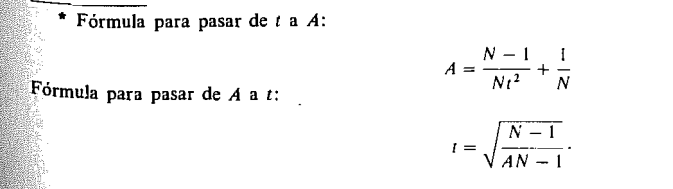

In [67]:
def A_Sandler_from_t(t = float, n= int) -> float:
    a = (n-1)/(n*(t**2)) + (1/n)
    return a

def t_from_A_Sandler(a = float, n= int) -> float:
    import numpy as np
    t = np.sqrt((n-1)/(a*n - 1))

In [68]:
datos_ej7 = pd.DataFrame({
    'Ranking' : [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'Hombre Blanco':[67.5, 68.2, 67.3, 66.4, 65.4, 64.4, 63.5, 62.5, 61.6, 60.6, 59.6, 58.6, 57.6, 56.7, 55.7, 54.7, 53.8, 52.8, 51.9, 51, 50.1],
    'Mujer Blanca': [74.4, 74.8, 73.9, 73.0, 72, 71, 70.1, 69.1, 68.1, 67.1, 66.2, 65.2, 64.2, 63.2, 62.2, 61.3, 60.3, 59.3, 58.3, 57.4, 56.4],
    'Hombre no Blanco': [60.9, 62.9, 62.1, 61.2, 60.3, 59.3, 58.4, 57.4, 56.5, 55.5, 54.5, 53.5, 52.6, 51.6, 50.7, 49.7, 48.8, 47.8, 46.9, 46, 45.1],
    'Mujer no Blanca': [66.5, 68, 67.2, 66.3, 65.4, 64.5, 63.5, 62.5, 61.6, 60.6, 59.6, 58.7, 57.7, 56.7, 55.7, 54.8, 53.8, 52.8, 51.9, 50.9, 50]
})
datos_ej7

,Ranking,Hombre Blanco,Mujer Blanca,Hombre no Blanco,Mujer no Blanca
0,0,67.5,74.4,60.9,66.5
1,1,68.2,74.8,62.9,68.0
2,2,67.3,73.9,62.1,67.2
3,3,66.4,73.0,61.2,66.3
4,4,65.4,72.0,60.3,65.4
5,5,64.4,71.0,59.3,64.5
6,6,63.5,70.1,58.4,63.5
7,7,62.5,69.1,57.4,62.5
8,8,61.6,68.1,56.5,61.6
9,9,60.6,67.1,55.5,60.6


### Parte A

In [69]:
test_t = stats.ttest_rel(datos_ej7['Hombre Blanco'], datos_ej7['Mujer Blanca'])
test_t

TtestResult(statistic=-257.2974116503249, pvalue=1.1125974104165284e-36, df=20)

In [70]:
test_t[0]

-257.2974116503249

In [71]:
sandler = A_Sandler_from_t(test_t[0], len(datos_ej7['Hombre Blanco']))
sandler

0.047633433612763655

Se rechaza H0. *Revisar la tabla de la página 380 para confirmar la conclusión aquí expuesta*.

### Parte B

In [72]:
test_t = stats.ttest_rel(datos_ej7['Hombre no Blanco'], datos_ej7['Mujer no Blanca'])
test_t

TtestResult(statistic=-167.3100864762031, pvalue=6.065900745340013e-33, df=20)

In [73]:
sandler = A_Sandler_from_t(test_t[0], len(datos_ej7['Hombre no Blanco']))
sandler

0.047653070137129876

Rechazamos H0, las mujeres no blancas presentan evidencia estadísticamente significativa de mayor longevidad respecto a hombres no blancos.

### Parte C

In [74]:
test_t = stats.ttest_rel(datos_ej7['Hombre Blanco'], datos_ej7['Mujer no Blanca'])
test_t

TtestResult(statistic=1.1420804814403385, pvalue=0.26690993704393995, df=20)

In [75]:
sandler = A_Sandler_from_t(test_t[0], len(datos_ej7['Hombre no Blanco']))
sandler

0.7777777777777559

No rechazmaos H0. Así, parece ser que una variable interviniente en el color de piel (años atrás se hubiera dicho "raza", ahora sabemos que es incorrecto empíricamente ese término) en la diferencia de esperanza de vida entre hombres y mujeres. A un mismo color de piel, las mujeres parecen vivir más que los hombres.

## Ejercicio 8

In [76]:
datos_ej8 = pd.DataFrame({
    'A' : [104, 112, 103, 115, 99, 104, 97, 107, 100, 104, 108],
    'B' : [102, 106, 107, 110, 93, 101, 99, 102, 98, 101, 102],
})
datos_ej8

,A,B
0,104,102
1,112,106
2,103,107
3,115,110
4,99,93
5,104,101
6,97,99
7,107,102
8,100,98
9,104,101


In [77]:
test_t = stats.ttest_rel(datos_ej8['A'], datos_ej8['B'])
test_t

TtestResult(statistic=2.897143873360593, pvalue=0.015911252125316806, df=10)

In [78]:
sandler = A_Sandler_from_t(test_t[0], len(datos_ej8['A']))
sandler

0.19921875

No rechazamos H0 a un 99% de nivel de confianza. Se puede comprobar que el valor crítico de la tabla A de Sandler es 0.181 (recordemos que aquí la significancia se concluye cuando el estadígrafo es *menor* o igual al valor crítico).

## Ejercicio 9

Hacemos pruebas unilaterales en este caso.

In [79]:
u = 100
test_t_a = stats.ttest_1samp(datos_ej8['A'], u, alternative = 'greater')
print('Test de hipótesis para fabricante A:')
test_t_a

Test de hipótesis para fabricante A:


TtestResult(statistic=2.94899888559568, pvalue=0.0072797891201680145, df=10)

In [80]:
test_t_b = stats.ttest_1samp(datos_ej8['B'], u, alternative = 'greater')
print('Test de hipótesis para fabricante B:')
test_t_b

Test de hipótesis para fabricante B:


TtestResult(statistic=1.3722266495724202, pvalue=0.09999352049798946, df=10)

Para el fabricante B no hay evidencia de que los tacómetros exageren las velocidades. De lo contrario, la media debería ser significativamente más alta para la muestra del fabricante. En cambio, para el fabricante A sí encontramos evidencia de diferencia significativa al 95% de nivel de confianza.

## Ejercicio 10

### Para el fabricante A

In [81]:
cuadrado_suma_dif = (sum(np.array(datos_ej8['A']) - u))**2
suma_dif_cuadrado = sum((np.array(datos_ej8['A']) - u)**2)

sandler = suma_dif_cuadrado /cuadrado_suma_dif
sandler

0.1954432182271271

Comparando con la tabla de valores críticos de A de Sandler, vemos que el valor es menor que el A crítico para una prueba unilateral al 5% y también al 1% (aunque mayor para una prueba bilateral al 1%). Rechazamos H0.

### Para el fabricante B

In [82]:
suma_dif_cuadrado = sum((datos_ej8['B'] - u)**2)
cuadrado_suma_dif = (sum(datos_ej8['B']- u))**2

sandler = suma_dif_cuadrado /cuadrado_suma_dif
sandler

0.5736961451247166

Este valor es mayor que todos los A críticos mencionados anteriormente. No rechazamos H0 en este caso.

## Ejercicio 15

In [83]:
datos_ej15 = pd.DataFrame({
    'Rebajas' : [3.77, 7.5, 4.95, 3.18, 5.77, 2.49, 8.77, 6.99, 2.99, 1.98, 0.49, 5.50, 0.99, 6.49, 5.49],
    'Competidor' : [3.95, 7.75, 4.99, 3.25, 5.98, 2.39, 9.49, 6.49, 2.95, 2.49, 0.52, 5.62, 0.98, 6.66, 5.55]    
})
datos_ej15

,Rebajas,Competidor
0,3.77,3.95
1,7.50,7.75
2,4.95,4.99
3,3.18,3.25
4,5.77,5.98
5,2.49,2.39
6,8.77,9.49
7,6.99,6.49
8,2.99,2.95
9,1.98,2.49


In [84]:
test_t = stats.ttest_rel(datos_ej15['Rebajas'] ,datos_ej15['Competidor'])
test_t

TtestResult(statistic=-1.6210585562234587, pvalue=0.1273025495438394, df=14)

In [85]:
sandler = A_Sandler_from_t(test_t[0], len(datos_ej15['Competidor']))
sandler

0.42183919838582806

No hay una diferencia estadísticamente significativa entre el supuesto almacen con rebajas respecto a su competidor.

## Ejercicio 16

In [86]:
datos_ej16 = pd.DataFrame({
    'Antes' : [25,26,27,22,29,25,29,30,25,28],
    'Después' : [23,24,26,23,30,24,26,32,25,29]    
})
datos_ej16

,Antes,Después
0,25,23
1,26,24
2,27,26
3,22,23
4,29,30
5,25,24
6,29,26
7,30,32
8,25,25
9,28,29


Vamos a calcular el test t y el estadístico A de Sandler de distintas formas para mostrar su equivalencia.

Cálculo manual de t (método de la diferencia directa).

In [87]:
t_obtenido = np.mean(datos_ej16['Antes'] - datos_ej16['Después'])/(statistics.stdev(datos_ej16['Antes'] - datos_ej16['Después'])/np.sqrt(len(datos_ej16['Antes'])))
t_obtenido

p_valor = 2 * (1 - t.cdf(abs(t_obtenido), df= len(datos_ej16['Antes'] - 1)))
print("t obtenido:", t_obtenido)
print("p-valor:", p_valor)

t obtenido: 0.768221279597376
p-valor: 0.4601123371687974


Cálculo de A con función de A de Sandler.

In [88]:
sandler = A_Sandler_from_t(t_obtenido, len(datos_ej16['Después']))
round(sandler, 3)

1.625

Cálculo de t con función de *stats* de t.

In [89]:
test_t = stats.ttest_rel(datos_ej16['Antes'], datos_ej16['Después'])
test_t

TtestResult(statistic=0.7682212795973759, pvalue=0.462036004631047, df=9)

Cálculo manual de A de Sandler.

In [90]:
suma_dif_cuadrado = sum((datos_ej16['Antes']- datos_ej16['Después'])**2)
cuadrado_suma_dif =(sum(datos_ej16['Antes']- datos_ej16['Después']))**2
sandler = suma_dif_cuadrado/cuadrado_suma_dif
sandler

1.625

## Ejercicio 17

In [91]:
# Datos del ejercicio 25 del capítulo 13
grupo1 = [5, 6, 7, 4, 8, 9, 6, 5, 7, 6]
grupo2 = [2, 3, 4, 3, 4, 4, 3, 1, 5, 4]

test_t = stats.ttest_ind(grupo1, grupo2)
test_t

TtestResult(statistic=5.015503913178175, pvalue=8.977892871866601e-05, df=18.0)

Ahora hacemos el ejercicio.

In [111]:
test_t = stats.ttest_rel(grupo1, grupo2)
test_t

TtestResult(statistic=8.215838362577493, pvalue=1.7882732796585845e-05, df=9)

In [112]:
sandler = A_Sandler_from_t(test_t[0], 10)
sandler

0.11333333333333334

Comparemos los errores estándares de cada forma de resolución.

### Muestras independientes

In [94]:
error_estandar = np.sqrt(statistics.variance(grupo1)/10 + statistics.variance(grupo2)/10)
error_estandar

0.5981452814975453

In [95]:
t_obtenido = (np.mean(grupo1) - np.mean(grupo2))/error_estandar
t_obtenido

5.015503913178176

### Muestras correlacionadas

In [96]:
error_estandar = statistics.stdev([a-b for a, b in zip(grupo1, grupo2)])/np.sqrt(10)
error_estandar

0.3651483716701107

In [97]:
t_obtenido = (np.mean(grupo1) - np.mean(grupo2))/error_estandar
t_obtenido

8.215838362577493

El error estándar para las muestras correlacionadas es más bajo en comparación con muestras independientes que contengan los mismos datos. Por lo tanto, para una misma diferencia de medias, el t calculado estará más desviado del valor bajo H0. 

Esto quiere decir que el test t para muestras correlacionadas es **más sensible** para captar diferencias: es menor la probabilidad de cometer un error tipo II (<u>**no**</u> rechazar H0 cuando es **falsa**). 

Ahora bien, esta mayor sensibilidad se da en muestras que efectivamente estén pareadas/relacionadas. Si lo están, un test t que no tenga en cuenta esto podría caer en el error tipo II. 

Pero si las muestras no están relacionadas y se usa un test t para muestras relacionadas, como este es más sensible que el test para muestras independientes, podría encontrar diferencias significativas donde no las hay. Así, usar un test t para muestras relacionadas cuando en realidad las muestras son independientes **aumenta la probabilidad de cometer un error tipo I**.

## Ejercicio 19

In [98]:
datos_ej19 = pd.DataFrame({
    'Disco' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Antes' : [25, 15, 10, 25, 30, 5, 0, 40, 50, 35],
    'Después' : [30, 17, 13, 30 , 25, 5, 1, 45, 45, 40]
})
datos_ej19

,Disco,Antes,Después
0,A,25,30
1,B,15,17
2,C,10,13
3,D,25,30
4,E,30,25
5,F,5,5
6,G,0,1
7,H,40,45
8,I,50,45
9,J,35,40


In [99]:
test_t = stats.ttest_rel(datos_ej19['Antes'], datos_ej19['Después'])
test_t

TtestResult(statistic=-1.290247993369129, pvalue=0.22912664158835067, df=9)

In [100]:
sandler = A_Sandler_from_t(test_t[0], 10)
sandler

0.6406249999999998

In [101]:
suma_cuadrado_dif = sum((datos_ej19['Antes'] - datos_ej19['Después'])**2)
cuadrado_sum_dif = (sum(datos_ej19['Antes'] - datos_ej19['Después']))**2
sandler = suma_cuadrado_dif/cuadrado_sum_dif
sandler

0.640625

## Ejercicio 23

In [102]:
datos_heterosexuales = pd.DataFrame({
    'Ante fotografías de hombres': [-0.4, -54.5, 12.5, 6.3, -1.5],
    'Ante fotografías de mujeres': [5.9, -22.4, 19.2, 39, 23.1]

})
datos_heterosexuales['Respuesta relavia M - H'] = datos_heterosexuales['Ante fotografías de mujeres']- datos_heterosexuales['Ante fotografías de hombres']
datos_heterosexuales

,Ante fotografías de hombres,Ante fotografías de mujeres,Respuesta relavia M - H
0,-0.4,5.9,6.3
1,-54.5,-22.4,32.1
2,12.5,19.2,6.7
3,6.3,39.0,32.7
4,-1.5,23.1,24.6


In [103]:
datos_homosexuales = pd.DataFrame({
    'Ante fotografías de hombres': [18.8, -4.6, 18.9, 18.2, 15.8],
    'Ante fotografías de mujeres': [11.2, -38, 18.1, -5.6, 21.5]

})
datos_homosexuales['Respuesta relavia M - H'] = datos_homosexuales['Ante fotografías de mujeres']- datos_homosexuales['Ante fotografías de hombres']
datos_homosexuales

,Ante fotografías de hombres,Ante fotografías de mujeres,Respuesta relavia M - H
0,18.8,11.2,-7.6
1,-4.6,-38.0,-33.4
2,18.9,18.1,-0.8
3,18.2,-5.6,-23.8
4,15.8,21.5,5.7


### Parte A

In [104]:
test_t = stats.ttest_rel(datos_heterosexuales['Ante fotografías de hombres'], datos_heterosexuales['Ante fotografías de mujeres'])
test_t

TtestResult(statistic=-3.4809801622381493, pvalue=0.025329419021258053, df=4)

In [105]:
sandler = A_Sandler_from_t(test_t[0], 5)
sandler

0.266021728515625

Otra forma de calcularlo

In [106]:
suma_dif_cuadrado = sum([x**2 for x in datos_heterosexuales['Respuesta relavia M - H']])
cuadrado_sum_dif = (sum(datos_heterosexuales['Respuesta relavia M - H']))**2
sandler = suma_dif_cuadrado / cuadrado_sum_dif
sandler

0.266021728515625

Rechazamos H0. Los varones heterosexuales muestran mayor respuesta pupilar ante las fotografías de mujeres. 

### Parte B

In [107]:
test_t = stats.ttest_rel(datos_homosexuales['Ante fotografías de hombres'], datos_homosexuales['Ante fotografías de mujeres'])
test_t

TtestResult(statistic=1.649249328960382, pvalue=0.1744416187491533, df=4)

In [108]:
sandler = A_Sandler_from_t(test_t[0], 5)
sandler

0.49411512231013854

No rechazamos H0: no hay evidencia de que los homosexuales tengan una diferente resupesta pupilar ante fotografías de hombres con respecto a fotografías de mujeres.

### Parte C

Aquí hay que deternerse en la lógica de comparación.

¿Por qué se utilizaría el test de muestras independientes?

Aquí se comparan dos grupos cuyos miembros no están emparejados, a diferencia de los casos anteriores en los cuales a un mismo sujeto se le hacían dos mediciones. Aquí ambas mediciones sirven para generar un único estadístico (la respuesta relativa) que sirve de comparación entre heterosexuales y homosexuales.

In [109]:
test_t =stats.ttest_ind(datos_heterosexuales['Respuesta relavia M - H'], datos_homosexuales['Respuesta relavia M - H'])
test_t

TtestResult(statistic=3.472525770509322, pvalue=0.008411465752977649, df=8.0)

In [110]:
dif_medias = np.mean(datos_heterosexuales['Respuesta relavia M - H']) - np.mean(datos_homosexuales['Respuesta relavia M - H'])
dif_medias

32.46

Rechazamos H0

Existe una respuesta diferente de los varones heterosexuales y de los varones homosexuales ante las fotografias de hombres y de mujeres. 